The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified so for classification I use both deep learning and sklearn(KNN , decision Tree , Naive Bayes , Random forest , Logistic regression) aproache and for each algorithm I check the confusion_matrix ,F1_ score , Accuracy score  , precision_score , recall_score


importing the libraris for data preprocessing and machine learning algorithm implementations

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from  collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import seaborn as sns

In [67]:
#read the data set
df = pd.read_csv('musk_csv.csv')

In [68]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


checking the information about the data set , that how many rows ans how many columns have 
and what are the data types of each columns

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


statistical describtion of data which have numeric data types

In [77]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


describtion of data which are in string format

In [78]:
df.describe(include='object')

,molecule_name,conformation_name
count,6598,6598
unique,102,6598
top,NON-MUSK-j146,252_1+172
freq,1044,1


check for the null values

In [79]:
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

finding the correlation of each attributes with the classification target so that the correlation value are in the range of 
-1 to 1

In [80]:
corr_matrix = df.corr()
corr_matrix['class'].sort_values(ascending=False)

class    1.000000
f26      0.163585
f118     0.154010
f9       0.147509
f108     0.147264
f77      0.145602
f86      0.143419
f48      0.138190
f95      0.137931
f53      0.135453
f139     0.129267
f119     0.127419
f52      0.125470
f81      0.123262
f114     0.121631
f113     0.118256
f17      0.117892
f7       0.113093
f22      0.107039
f82      0.104050
f23      0.103916
f112     0.098047
f160     0.097957
f56      0.091634
f98      0.084038
f21      0.082980
f34      0.082844
f57      0.082780
f127     0.078154
f128     0.069481
           ...   
f19     -0.175573
f54     -0.179462
f125    -0.179467
f11     -0.184796
f103    -0.190685
f46     -0.191578
f106    -0.193720
f80     -0.194174
f104    -0.195028
f8      -0.201554
f91     -0.205506
f44     -0.206215
f110    -0.206606
f74     -0.207552
f105    -0.208192
f111    -0.208512
f15     -0.210261
f45     -0.210292
f78     -0.210497
f135    -0.210645
f49     -0.210816
f109    -0.211642
f163    -0.217481
f14     -0.218065
f96     -0

specify the feature(x whihc are independant) and target(y which is dependent on values of x) variable 

In [81]:
X = df.iloc[: , :-1]
X =X.iloc[: , 3:]
y = df['class']

In [82]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [11]:
Counter(y)

Counter({1: 1017, 0: 5581})

using sklearn we can split the data into traning and test part . that from over all data 20% are for testing and 80% are for 
traning.
if we check the data it is not a normal(standard) data so for the purpose of gething accurate result we have to standardize data using standard scaler or any other methods . In hereI use Standad Scaler

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Users\MORADI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MORADI\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\MORADI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


# implementation of LogisticRegression

In [86]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print("confusion_matrix:",confusion_matrix(y_test , y_predict))
print("F1_score :",metrics.f1_score(y_test , y_predict))
print("Accuracy score:",metrics.accuracy_score(y_test , y_predict))
print("precision_score:",metrics.precision_score(y_test , y_predict))
print("recall_score:",metrics.recall_score(y_test , y_predict))

C:\Users\MORADI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion_matrix: [[1096   21]
 [  48  155]]
F1_ score : 0.8179419525065964
Accuracy score: 0.9477272727272728
precision_score: 0.8806818181818182
recall_score: 0.7635467980295566


In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5278, 166)
(1320, 166)
(5278,)
(1320,)


# defining the model structure for deep learning implementation 

In [89]:
input_dim = X_train.shape[1]  # Number of features
# input_dim
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [90]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                1670      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


# fiting the the deep learning algorithm 

In [91]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

Train on 5278 samples, validate on 1320 samples
Epoch 1/100
5278/5278 [==============================] - 1s 130us/step - loss: 0.2883 - accuracy: 0.8941 - val_loss: 0.2116 - val_accuracy: 0.9174
Epoch 2/100
5278/5278 [==============================] - 0s 72us/step - loss: 0.1794 - accuracy: 0.9326 - val_loss: 0.1646 - val_accuracy: 0.9311
Epoch 3/100
5278/5278 [==============================] - 0s 68us/step - loss: 0.1392 - accuracy: 0.9441 - val_loss: 0.1300 - val_accuracy: 0.9462
Epoch 4/100
5278/5278 [==============================] - 0s 71us/step - loss: 0.1129 - accuracy: 0.9549 - val_loss: 0.1113 - val_accuracy: 0.9500
Epoch 5/100
5278/5278 [==============================] - 0s 71us/step - loss: 0.0950 - accuracy: 0.9629 - val_loss: 0.0947 - val_accuracy: 0.9591
Epoch 6/100
5278/5278 [==============================] - 0s 76us/step - loss: 0.0814 - accuracy: 0.9676 - val_loss: 0.0862 - val_accuracy: 0.9659
Epoch 7/100
5278/5278 [==============================] - 0s 75us/step - los

5278/5278 [==============================] - 0s 85us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 0.9939
Epoch 57/100
5278/5278 [==============================] - 0s 71us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0168 - val_accuracy: 0.9947
Epoch 58/100
5278/5278 [==============================] - 0s 66us/step - loss: 7.5888e-04 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9939
Epoch 59/100
5278/5278 [==============================] - 0s 67us/step - loss: 7.0670e-04 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9962
Epoch 60/100
5278/5278 [==============================] - 0s 69us/step - loss: 6.2303e-04 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9939
Epoch 61/100
5278/5278 [==============================] - 0s 65us/step - loss: 6.4277e-04 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 0.9947
Epoch 62/100
5278/5278 [==============================] - 0s 70us/step - loss: 6.0216e-04 - accuracy: 1.0000 - val_

# Training  and Testing Accuracy of Deep learning model

In [55]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9939


In [92]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


# visulization of Training and validation accuracy 


# visulization of Training and validation loss

In [95]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

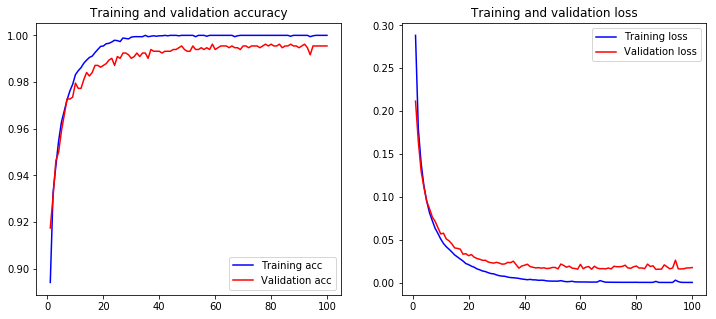

In [96]:
plot_history(history)

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print("confusion_matrix:",confusion_matrix(y_test , y_pred))
print("F1_ score :",metrics.f1_score(y_test , y_pred))
print("Accuracy score:",metrics.accuracy_score(y_test , y_pred))
print("precision_score:",metrics.precision_score(y_test , y_pred))
print("recall_score:",metrics.recall_score(y_test , y_pred))

confusion_matrix: [[564   2]
 [ 16  78]]
F1_ score : 0.896551724137931
Accuracy score: 0.9727272727272728
precision_score: 0.975
recall_score: 0.8297872340425532


# Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_nb = classifier.predict(X_test)
print("confusion_matrix:",confusion_matrix(y_test , y_nb))
print("F1_ score :",metrics.f1_score(y_test , y_nb))
print("Accuracy score:",metrics.accuracy_score(y_test , y_nb))
print("precision_score:",metrics.precision_score(y_test , y_nb))
print("recall_score:",metrics.recall_score(y_test , y_nb))

confusion_matrix: [[484  82]
 [ 22  72]]
F1_ score : 0.5806451612903226
Accuracy score: 0.8424242424242424
precision_score: 0.4675324675324675
recall_score: 0.7659574468085106


# Decision Tree Classifier

In [61]:
from sklearn .tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dt.fit(X_train,y_train)
y_dt=dt.predict(X_test)
print("confusion_matrix:",confusion_matrix(y_test , y_dt))
print("F1_ score :",metrics.f1_score(y_test , y_dt))
print("Accuracy score:",metrics.accuracy_score(y_test , y_dt))
print("precision_score:",metrics.precision_score(y_test , y_dt))
print("recall_score:",metrics.recall_score(y_test , y_dt))

confusion_matrix: [[552  14]
 [ 42  52]]
F1_ score : 0.65
Accuracy score: 0.9151515151515152
precision_score: 0.7878787878787878
recall_score: 0.5531914893617021


# Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train,y_train)
rf_pred=knn.predict(X_test)
print("confusion_matrix:",confusion_matrix(y_test , rf_pred))
print("F1_ score :",metrics.f1_score(y_test , rf_pred))
print("Accuracy score:",metrics.accuracy_score(y_test , rf_pred))
print("precision_score:",metrics.precision_score(y_test , rf_pred))
print("recall_score:",metrics.recall_score(y_test , rf_pred))

confusion_matrix: [[564   2]
 [ 16  78]]
F1_ score : 0.896551724137931
Accuracy score: 0.9727272727272728
precision_score: 0.975
recall_score: 0.8297872340425532


# conclusion 

deep learning algorithm has the highest accuracy = 99%
random forest has the second highest accuracy = 97%